In [1]:
"""
Exp06C：execution delay and transaction cost

Goal:
- Test how execution delay and transaction costs interact in eroding tradable alpha.


Fixed:
- Asset: SPY
- Signal: fixed (MA_WINDOW = 80)
- Regime / sample
- Risk control: none


Sweep: 
- EXEC_DELAY ∈ {0, 1}
- COST_RATE ∈ {0.0, 0.0005, 0.001, 0.002, 0.003} # Transaction cost

"""

'\nExp06C：execution delay and transaction cost\n\nGoal:\n- Test how execution delay and transaction costs interact in eroding tradable alpha.\n\n\nFixed:\n- Asset: SPY\n- Signal: fixed (MA_WINDOW = 80)\n- Regime / sample\n- Risk control: none\n\n\nSweep: \n- EXEC_DELAY ∈ {0, 1}\n- COST_RATE ∈ {0.0, 0.0005, 0.001, 0.002, 0.003} # Transaction cost\n\n'

In [2]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [3]:
import pandas as pd
from runner import run

In [4]:
# Sweep: execution delay 

from copy import deepcopy
from config import Config
from dataclasses import replace


cfg_base = replace(Config(), 
                   MA_WINDOW = 80,   # 和Exp02同
                   RISK_MODE = "none", 
                   USE_RISK_OFF_GATE = False 
                  )  

delays = [0, 1]
cost_rates  = [0.0, 0.0005, 0.001, 0.002, 0.003]


rows = []

for d in delays:
    cfg_d = replace(cfg_base, EXEC_DELAY=d)

    for cost_rate in cost_rates:   
        cfg_tmp = replace(cfg_d, COST_RATE=cost_rate)

    
        _, summary = run(cfg_tmp)
        summary["EXEC_DELAY"] = d # dict
        summary["COST_RATE"] = cost_rate
        rows.append(summary)

exp06 = pd.DataFrame(rows).sort_values(["EXEC_DELAY","COST_RATE"]) # 汇总成一个 实验结果表（experiment table）

exp06


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,EXEC_DELAY,COST_RATE
0,0.263384,-0.082251,2.266054,108.0,2437,0,0.0000
1,0.256322,-0.082251,2.217895,108.0,2437,0,0.0005
2,0.249297,-0.082251,2.168994,108.0,2437,0,0.0010
3,0.235354,-0.082251,2.069079,108.0,2437,0,0.0020
4,0.221552,-0.082251,1.966548,108.0,2437,0,0.0030
5,0.081822,-0.169437,0.765314,108.0,2436,1,0.0000
6,0.075741,-0.180989,0.714391,108.0,2436,1,0.0005
7,0.069690,-0.192385,0.663331,108.0,2436,1,0.0010
8,0.057683,-0.214722,0.560935,108.0,2436,1,0.0020
9,0.045798,-0.236461,0.458396,108.0,2436,1,0.0030


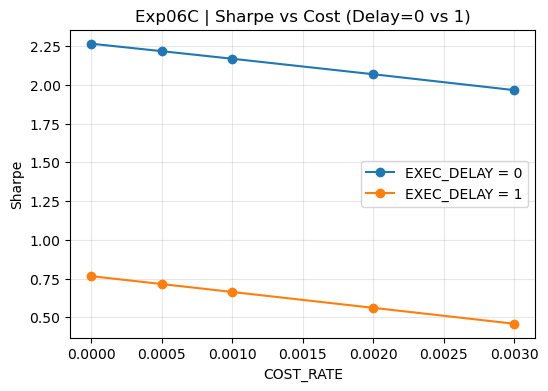

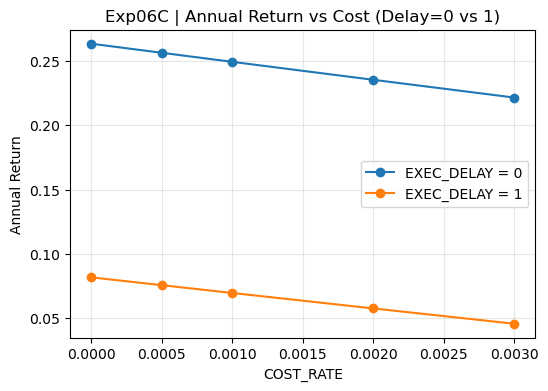

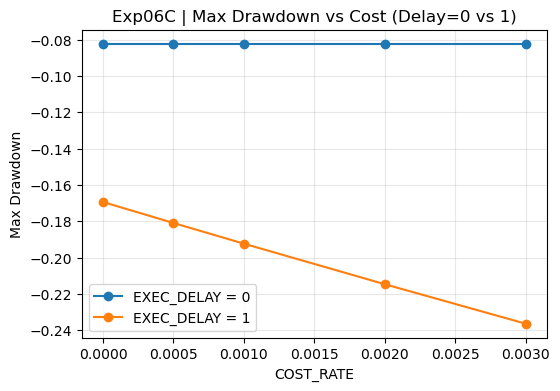

In [6]:
import matplotlib.pyplot as plt

df = exp06.copy()

def plot_cost_lines(metric):
    fig, ax = plt.subplots(figsize=(6,4))

    for d in sorted(df["EXEC_DELAY"].unique()):
        sub = df[df["EXEC_DELAY"] == d].sort_values("COST_RATE")
        ax.plot(
            sub["COST_RATE"],
            sub[metric],
            marker="o",
            label=f"EXEC_DELAY = {d}"
        )

    ax.set_title(f"Exp06C | {metric} vs Cost (Delay=0 vs 1)")
    ax.set_xlabel("COST_RATE")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

plot_cost_lines("Sharpe")
plot_cost_lines("Annual Return")
plot_cost_lines("Max Drawdown")


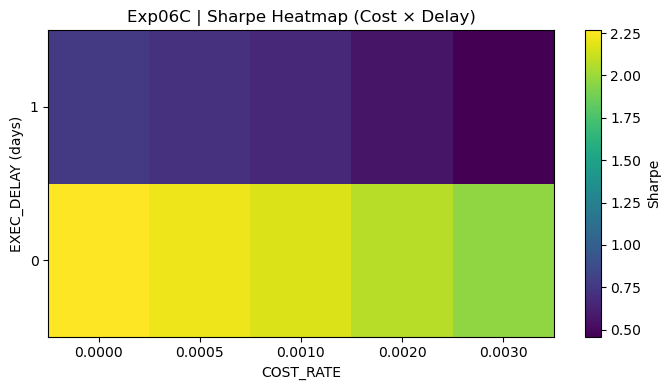

In [7]:
import numpy as np
import matplotlib.pyplot as plt

pivot = exp06.pivot(index="EXEC_DELAY", columns="COST_RATE", values="Sharpe").sort_index()

fig, ax = plt.subplots(figsize=(7,4))
im = ax.imshow(pivot.values, aspect="auto", origin="lower")

ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels([f"{c:.4f}" for c in pivot.columns])
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)

ax.set_xlabel("COST_RATE")
ax.set_ylabel("EXEC_DELAY (days)")
ax.set_title("Exp06C | Sharpe Heatmap (Cost × Delay)")

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Sharpe")

plt.tight_layout()
plt.show()
